In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean,stdev
from sklearn.metrics import accuracy_score


In [2]:
datasets = pd.read_csv('breast-cancer.csv') #Importing the datasets of diabetes

In [3]:
cancer = pd.DataFrame(datasets)         #Converting the main file to a dataframe
cancer = pd.DataFrame(cancer.drop('id', axis=1))    


In [4]:
df_one = pd.get_dummies(cancer["diagnosis"])
print(df_one)
 
# Binary Data is Concatenated into Dataframe
cancer = pd.concat((df_one, cancer), axis=1)

cancer = cancer.drop(["diagnosis"], axis=1)
 
# We want Male =0 and Female =1 So we drop Male column here
cancer = cancer.drop(["M"], axis=1)
 


     B  M
0    0  1
1    0  1
2    0  1
3    0  1
4    0  1
..  .. ..
564  0  1
565  0  1
566  0  1
567  0  1
568  1  0

[569 rows x 2 columns]


In [5]:
cancer.head()                                                                #visualising the features and outcome.head()                         

,B,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer.describe()                      #summarising the stats

,B,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
cancer.isnull()            #checking for missing values

,B,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
cancer.isnull().sum()      #checking the total missing value for each features

B                          0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
cancer.corr()  #negative/positive - negatively/positively correlated,  0 - not corelated that much
#No significant correlation among features, hence there is no chance of occurring multi collinearity

#no need to do PCA 

,B,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
B,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
x = cancer.iloc[:,1:].values

y = cancer.iloc[:,0].values
#slicing data and target values

In [11]:
from sklearn.preprocessing import StandardScaler   #using standardization
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split #splitting the data to test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#need to find whether 0.8 to 0.2 is correct or not

In [13]:
avg_accuracy = [] #average of accuracy score for each folds
std_accuracy =[] #standard deviation of accuracy for each folds
for i in range(3,20):
    model_accu_stratified = []
    skf = StratifiedKFold(n_splits=i)
    model = LogisticRegression()
    for train_index, test_index in skf.split(x_train, y_train):
        x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        model.fit(x_train_fold, y_train_fold)
        model_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    
    avg_accuracy.append(mean(model_accu_stratified))
    std_accuracy.append(stdev(model_accu_stratified))
    
#cross validation using stratified k fold       

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


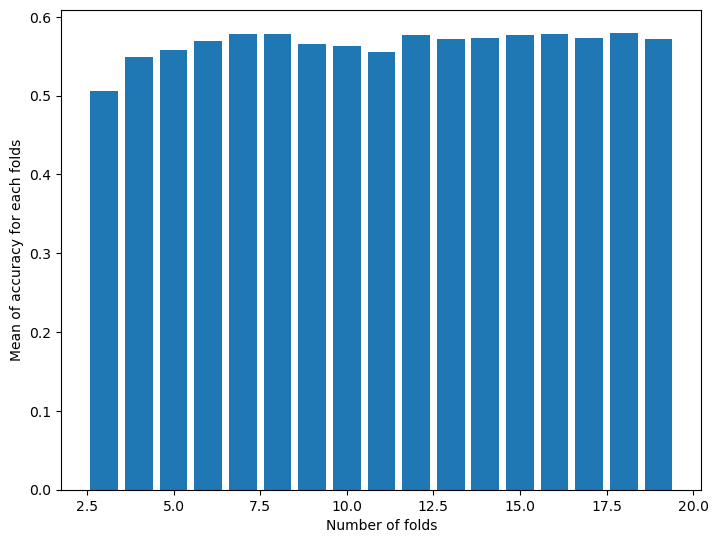

In [14]:
fold_range = []
for i in range(3,20):
    fold_range.append(i)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
number_of_folds = fold_range
ax.bar(number_of_folds,avg_accuracy)
ax.set_ylabel('Mean of accuracy for each folds')
ax.set_xlabel('Number of folds')
plt.show()
    
#almost all the mean accuracy are some what equal

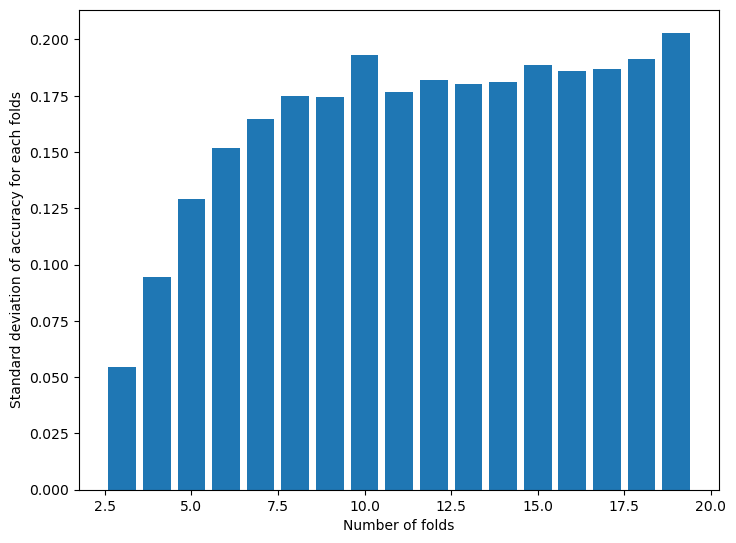

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
number_of_folds = fold_range
ax.bar(number_of_folds,std_accuracy)
ax.set_ylabel('Standard deviation of accuracy for each folds')
ax.set_xlabel('Number of folds')
plt.show()

#n_folds =7, has the less standard deviation among other folds

In [16]:
skf = StratifiedKFold(n_splits=7)
model1 = LogisticRegression()
for train_index, test_index in skf.split(x_train, y_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model1.fit(x_train_fold, y_train_fold)
    model_accu_stratified.append(model1.score(x_test_fold, y_test_fold))

y_pred1 = model1.predict(x_test)

acc_score = accuracy_score(y_test, y_pred1, normalize=True)
print('Accuracy score is',acc_score,'%')

print(y_pred1)
print(y_test)
# using n_fold = 7 and training the model 

Accuracy score is 0.6842105263157895 %
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1]
[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]


/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dharmendraselvaratnam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Naive Bayes Model

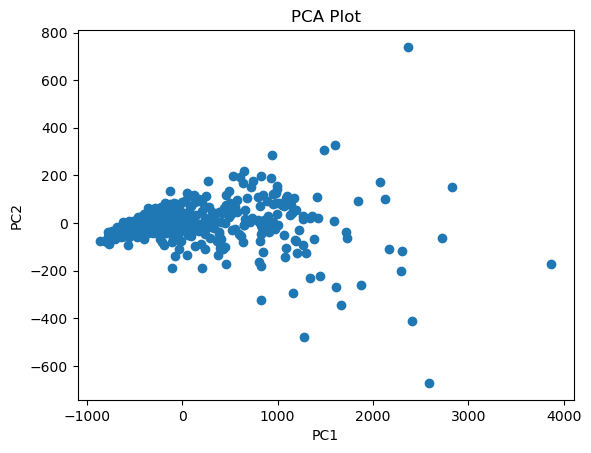

In [17]:
from sklearn.decomposition import PCA

# create the PCA object
pca = PCA(n_components=2)

# fit and transform the data
x_new = pca.fit_transform(x)

# plot the transformed data
plt.scatter(x_new[:, 0], x_new[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

# according to the plot it is a continous data, so it cant be a bernoulli or multinominal distribution, so it should have to be a 
#gaussian distribution as it has a bell shape curve

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
avg_accuracy = [] #average of accuracy score for each folds
std_accuracy =[] #standard deviation of accuracy for each folds
for i in range(3,20):
    model_accu_stratified = []
    skf = StratifiedKFold(n_splits=i)
    model2 = GaussianNB()
    for train_index, test_index in skf.split(x_train, y_train):
        x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        model2.fit(x_train_fold, y_train_fold)
        model_accu_stratified.append(model2.score(x_test_fold, y_test_fold))
    
    avg_accuracy.append(mean(model_accu_stratified))
    std_accuracy.append(stdev(model_accu_stratified))
    
#Experimenting with number of k to find best kfold

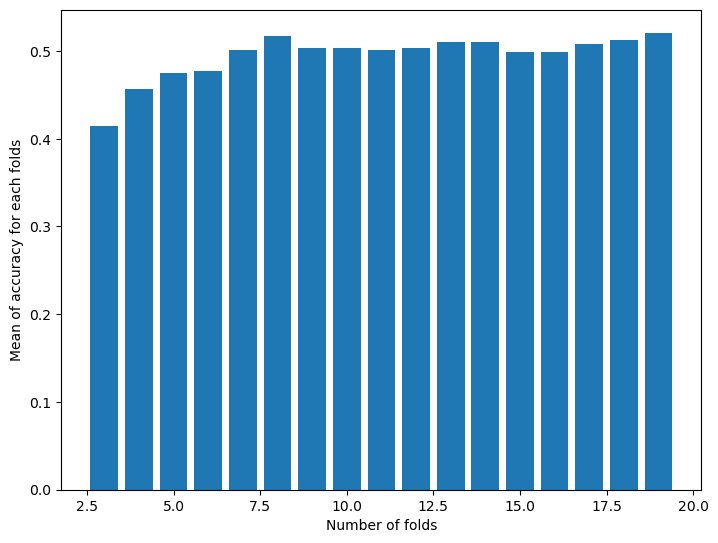

In [20]:
fold_range = []
for i in range(3,20):
    fold_range.append(i)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
number_of_folds = fold_range
ax.bar(number_of_folds,avg_accuracy)
ax.set_ylabel('Mean of accuracy for each folds')
ax.set_xlabel('Number of folds')
plt.show()
    
#15 gives the high mean accuracy compared with others

In [21]:
skf = StratifiedKFold(n_splits=8)
model2 = GaussianNB()
for train_index, test_index in skf.split(x_train, y_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model2.fit(x_train_fold, y_train_fold)
    model_accu_stratified.append(model2.score(x_test_fold, y_test_fold))

y_pred2 = model2.predict(x_test)

acc_score = accuracy_score(y_test, y_pred2, normalize=True)
print('Accuracy score is',acc_score,'%')

print(y_pred2)
print(y_test)

#training the model with kfold=8, though high kfolds 18 gives better accuracy but the training sample is getting less(569x0.8/18 =31).

Accuracy score is 0.7105263157894737 %
[0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 1 0 0]
[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
print('The confusion matrix of knn','\n',confusion_matrix)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred2)
print('The confusion matrix of naive bayes model','\n',confusion_matrix)

#using confusion matrix metric to evaluate model performance

The confusion matrix of knn 
 [[10 32]
 [ 4 68]]
The confusion matrix of naive bayes model 
 [[34  8]
 [25 47]]


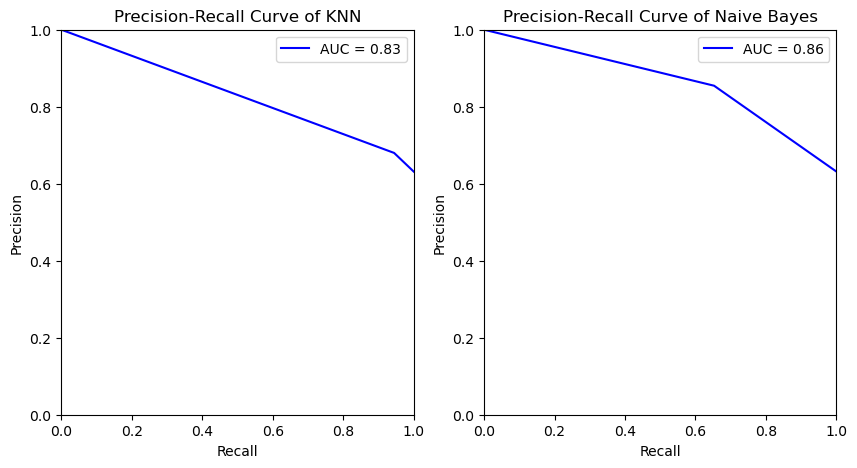

In [23]:
import matplotlib.pyplot as plt
from sklearn import metrics
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the precision-recall curve for model1 in the first subplot
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred1)
prc_auc = metrics.auc(recall, precision)
ax1.plot(recall, precision, 'b', label = 'AUC = %0.2f' % prc_auc)
ax1.set_title('Precision-Recall Curve of KNN')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')
ax1.legend(loc = 'upper right')

# Plot the precision-recall curve for model2 in the second subplot
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred2)
prc_auc = metrics.auc(recall, precision)
ax2.plot(recall, precision, 'b', label = 'AUC = %0.2f' % prc_auc)
ax2.set_title('Precision-Recall Curve of Naive Bayes')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')
ax2.legend(loc = 'upper right')

# Show the figure
plt.show()


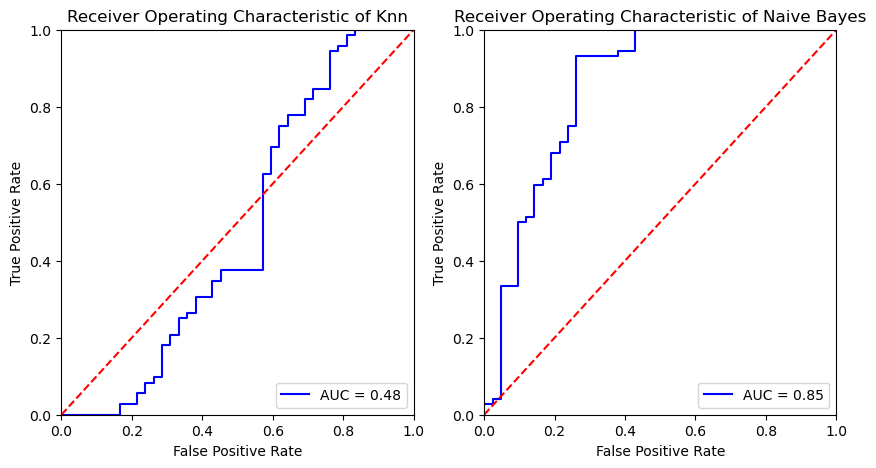

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the ROC curve for model1 in the first subplot
y_score = model1.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
ax1.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
ax1.set_title('Receiver Operating Characteristic of Knn')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')

# Plot the ROC curve for model2 in the second subplot
y_score = model2.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
ax2.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
ax2.set_title('Receiver Operating Characteristic of Naive Bayes')
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc = 'lower right')

# Show the figure
plt.show()

In [25]:
from sklearn.metrics import recall_score

# y_true is a list of true labels, y_pred is a list of predicted labels
recall1 = recall_score(y_test, y_pred1)
recall2 = recall_score(y_test,y_pred2)

from sklearn.metrics import confusion_matrix

# y_true is a list of true labels, y_pred is a list of predicted labels
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
specificity1 = tn / (tn + fp)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
specificity2 = tn / (tn + fp)

print(f"Model 1 knn: recall = {recall1:.4f}, specificity = {specificity1:.4f}")
print(f"Model 2 naive bayes: recall = {recall2:.4f}, specificity = {specificity2:.4f}")

Model 1 knn: recall = 0.9444, specificity = 0.2381
Model 2 naive bayes: recall = 0.6528, specificity = 0.8095


In [26]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume that y_true and y_pred1 are the true labels and predicted labels for model 1, respectively
# Assume that y_true and y_pred2 are the true labels and predicted labels for model 2, respectively

# Calculate evaluation metrics for model 1
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)

# Calculate evaluation metrics for model 2
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

# Compare the evaluation metrics of the two models
print(f"Model 1 -Knn: Accuracy = {accuracy1:.4f}, Precision = {precision1:.4f}, Recall = {recall1:.4f}, F1 Score = {f11:.4f}")
print(f"Model 2 - Naive bayes: Accuracy = {accuracy2:.4f}, Precision = {precision2:.4f}, Recall = {recall2:.4f}, F1 Score = {f12:.4f}")

Model 1 -Knn: Accuracy = 0.6842, Precision = 0.6800, Recall = 0.9444, F1 Score = 0.7907
Model 2 - Naive bayes: Accuracy = 0.7105, Precision = 0.8545, Recall = 0.6528, F1 Score = 0.7402


In [27]:
# Though both the model has some metrics with high value and some metrics with low values
#A prediction from both the results cannot be taken off for this cancer datasets
# A proper model with different algorithm should have to be used to predict the result of this dataset

comparision between both models

In [28]:
# naive bayes model has higher AUC(0.86) in precision recall curve and precision value also high
#So this model has low false positive cases which means it will rarely predicts a patient without a cancer as cancer patient
#At the same time it has low recall value : thus it will predict a positive cancer patient as negative which is a dangerous scenario


In [29]:
#on the other hand logistic regression model has higher AUC for recall curve and high recall value
#so, this model has low false negative cases : which is actually a good scenario
#but at the same time it has high false positives (specifity is high): it predicts a a person without cancer as a cancer patient
#ROC curve value is also less : SO the abiliy to distingusih between positive and negative case is also less for this model

In [30]:
#SO overall, both model can be combined and used for prediction to get a balance results
# otherwise it is mandatory to find an alternative algorithm such as decision tree to predict this datasets results
#as this data set is related  with human health condition(high sensitive)

Limitation and drawbacks of naive bayes and logistic regression

In [31]:
#When we consider logistic regression: 
#as it is a simple model it doesnt have the ability to capture the complex relationship between feature and target
#it assumes that features and target has linear relationship: actual dataset is also having linear relations(see plots below)

#naive bayes 
# This assumes feature variables are independent to each other : it seems this data set feature is almost independent 
#thats why the model is producing good results 
# very sensitive to the balance of datset : it performs poor in imbalance data set
#Simple model so rarely capture the complex relationship (compared to decision tree)
    